# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [7]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
load_dotenv('../../Python Works/DOTENV/Keys.env')
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\brand\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Python-dotenv could not parse statement starting at line 8


In [8]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API")
type(api_key)

str

In [9]:
# Create a newsapi client
newsapi=NewsApiClient(api_key=api_key)

In [20]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy")
btc_headlines

{'status': 'ok',
 'totalResults': 7047,
 'articles': [{'source': {'id': 'bbc-news', 'name': 'BBC News'},
   'author': 'https://www.facebook.com/bbcnews',
   'title': "Indian PM Modi's Twitter hacked with bitcoin tweet",
   'description': "The Indian prime minister's account had a message stating that bitcoin would be distributed to citizens.",
   'url': 'https://www.bbc.co.uk/news/world-asia-india-59627124',
   'urlToImage': 'https://ichef.bbci.co.uk/news/1024/branded_news/5998/production/_122063922_mediaitem122063921.jpg',
   'publishedAt': '2021-12-12T10:59:57Z',
   'content': "Image source, AFP via Getty Images\r\nImage caption, Modi has has more than 70 million Twitter followers\r\nIndian Prime Minister Narendra Modi's Twitter account was hacked with a message saying India ha… [+854 chars]"},
  {'source': {'id': None, 'name': 'New York Times'},
   'author': 'Corey Kilgannon',
   'title': 'Why New York State Is Experiencing a Bitcoin Boom',
   'description': 'Cryptocurrency miners a

In [21]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="etherium",
    language="en",
    page_size=100,
    sort_by="relevancy")
eth_headlines

{'status': 'ok',
 'totalResults': 41,
 'articles': [{'source': {'id': None, 'name': 'Boing Boing'},
   'author': 'Jason Weisberger',
   'title': 'The group that failed to buy a copy of the US Constitution lost a lot of crypto in transaction fees',
   'description': 'The ConstitutionDAO group did not win its bid to buy a copy of the US Constitution, however, amassing the $40 million USD in Etherium cost them $1 million in transaction fees, and assumedly will cost similar to return the, now-lesser valued, coin. — Read the …',
   'url': 'https://boingboing.net/2021/11/23/the-group-who-failed-to-buy-a-copy-of-the-us-constitution-lost-a-lot-crypto-transaction-in-fees.html',
   'urlToImage': 'https://i2.wp.com/boingboing.net/wp-content/uploads/2021/11/shutterstock_687484867.jpg?fit=1000%2C342&ssl=1',
   'publishedAt': '2021-11-23T16:46:29Z',
   'content': 'The ConstitutionDAO group did not win its bid to buy a copy of the US Constitution, however, amassing the $40 million USD in Etherium cos

In [28]:
# Create the Bitcoin sentiment scores
btc_sentiment = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu})
        
    except AttributeError:
        pass

In [29]:
#Create the Bitcoin sentiment DataFrame
btc_df = pd.DataFrame(btc_sentiments)

In [30]:
# Create the Ethereum sentiment scores
eth_sentiment = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu})
        
    except AttributeError:
        pass

In [31]:
#Create the Bitcoin sentiment DataFrame
eth_df = pd.DataFrame(eth_sentiments)

In [75]:
btc_df

,text,date,compound,positive,negative,neutral
0,"Image source, AFP via Getty Images\r\nImage ca...",2021-12-12,-0.4019,0.000,0.078,0.922
1,The plant opening northeast of Niagara Falls t...,2021-12-06,0.0000,0.000,0.000,1.000
2,"Earlier this year, Nothing released a pair of ...",2021-12-01,0.5106,0.099,0.000,0.901
3,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...",2021-11-22,0.0000,0.000,0.000,1.000
4,Posted \r\nAfter becoming the first country to...,2021-11-22,0.4767,0.136,0.000,0.864
...,...,...,...,...,...,...
395,"Erik Thedeen, director of the Swedish Financia...",2021-11-25,0.3400,0.116,0.000,0.884
396,In 2013 a British man accidentally threw away ...,2021-12-12,-0.2263,0.050,0.101,0.849
397,"Sen. Cynthia Lummis, a Republican from Wyoming...",2021-12-20,0.0000,0.000,0.000,1.000
398,"Oftentimes, the symptoms of a heart attackespe...",2021-12-09,0.0772,0.070,0.062,0.868


In [32]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,400.000000,400.000000,400.000000,400.00000
mean,0.106245,0.063030,0.038500,0.89845
std,0.363330,0.064198,0.058083,0.08900
min,-0.802000,0.000000,0.000000,0.66000
25%,-0.006450,0.000000,0.000000,0.84575
50%,0.000000,0.054000,0.000000,0.91950
75%,0.386225,0.114000,0.069250,1.00000
max,0.790600,0.230000,0.246000,1.00000


In [33]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,164.000000,164.000000,164.000000,164.000000
mean,-0.006315,0.037512,0.043390,0.919098
std,0.369288,0.054753,0.062705,0.082139
min,-0.891000,0.000000,0.000000,0.707000
25%,-0.102700,0.000000,0.000000,0.867000
50%,0.000000,0.000000,0.000000,0.950000
75%,0.250000,0.088000,0.054000,1.000000
max,0.658800,0.189000,0.293000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the higher positive mean score of .063030

Q: Which coin had the highest negative score?

A: Etherium has the highest negative score of 0.293000

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score of 0.230000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [36]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [37]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [38]:
# Create a list of stopwords
sw = set(stopwords.words('english'))
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [161]:
# Complete the tokenizer function, Remove the punctuation from text, Create a tokenized list of the words, 
# Lemmatize words into root words, Convert the words to lowercase, Remove the stop words
    
def tokenizer(text):
    """Tokenizes text."""
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(text))
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens


In [162]:
# Create a new tokens column for Bitcoin
btc_token=tokenizer(btc_df['text'])
btc_token

['image',
 'source',
 'afp',
 'via',
 'getty',
 'imagesrnimage',
 'ca',
 'plant',
 'opening',
 'northeast',
 'niagara',
 'falls',
 'earlier',
 'year',
 'nothing',
 'released',
 'pair',
 'mizata',
 'el',
 'salvadorlondon',
 'nov',
 'reuters',
 'posted',
 'rnafter',
 'becoming',
 'first',
 'country',
 'erik',
 'thedeen',
 'director',
 'swedish',
 'financia',
 'british',
 'man',
 'accidentally',
 'threw',
 'away',
 'sen',
 'cynthia',
 'lummis',
 'republican',
 'wyoming',
 'oftentimes',
 'symptom',
 'heart',
 'attackespe',
 'robert',
 'kiyosakithe',
 'rich',
 'dad',
 'channelyoutubername',
 'text',
 'length',
 'dtype',
 'object']

In [126]:
btc_df['tokens']=btc_token
btc_df

ValueError: Length of values (55) does not match length of index (400)

In [127]:
# Create a new tokens column for Ethereum
eth_token=tokenizer(eth_df['text'])
eth_token

['constitutiondao',
 'group',
 'win',
 'bid',
 'blockchain',
 'digital',
 'recordkeeping',
 'techn',
 'ubisoft',
 'ha',
 'made',
 'first',
 'major',
 'compan',
 'bitcoin',
 'cryptos',
 'trading',
 'w',
 'bored',
 'ape',
 'decked',
 'stripe',
 'san',
 'francisco',
 'rnal',
 'kelly',
 'belief',
 'ha',
 'theres',
 'lot',
 'modern',
 'economic',
 'theory',
 'tha',
 'cryptocurrency',
 'exchange',
 'bitmart',
 'wa',
 'hacked',
 'yes',
 'ubisoft',
 'among',
 'game',
 'publisher',
 'inve',
 'last',
 'year',
 'entrepreneur',
 'investor',
 'marriename',
 'text',
 'length',
 'dtype',
 'object']

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [128]:
from collections import Counter
from nltk import ngrams

In [129]:
# Generate the Bitcoin N-grams where N=2
btc_counts=Counter(ngrams(btc_token, n=2))

In [130]:
# Generate the Ethereum N-grams where N=2
eth_counts=Counter(ngrams(eth_token, n=2))

In [131]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [132]:
# Use token_count to get the top 10 words for Bitcoin
btc_token_count=token_count(btc_counts)
btc_token_count

[(('image', 'source'), 1),
 (('source', 'afp'), 1),
 (('afp', 'via'), 1),
 (('via', 'getty'), 1),
 (('getty', 'imagesrnimage'), 1),
 (('imagesrnimage', 'ca'), 1),
 (('ca', 'plant'), 1),
 (('plant', 'opening'), 1),
 (('opening', 'northeast'), 1),
 (('northeast', 'niagara'), 1)]

In [133]:
# Use token_count to get the top 10 words for Ethereum
eth_token_count=token_count(eth_counts)
eth_token_count

[(('constitutiondao', 'group'), 1),
 (('group', 'win'), 1),
 (('win', 'bid'), 1),
 (('bid', 'blockchain'), 1),
 (('blockchain', 'digital'), 1),
 (('digital', 'recordkeeping'), 1),
 (('recordkeeping', 'techn'), 1),
 (('techn', 'ubisoft'), 1),
 (('ubisoft', 'ha'), 1),
 (('ha', 'made'), 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [134]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [138]:
# Generate the Bitcoin word cloud
btc_str = ' '.join(btc_token)
eth_str = ' '.join(eth_token)

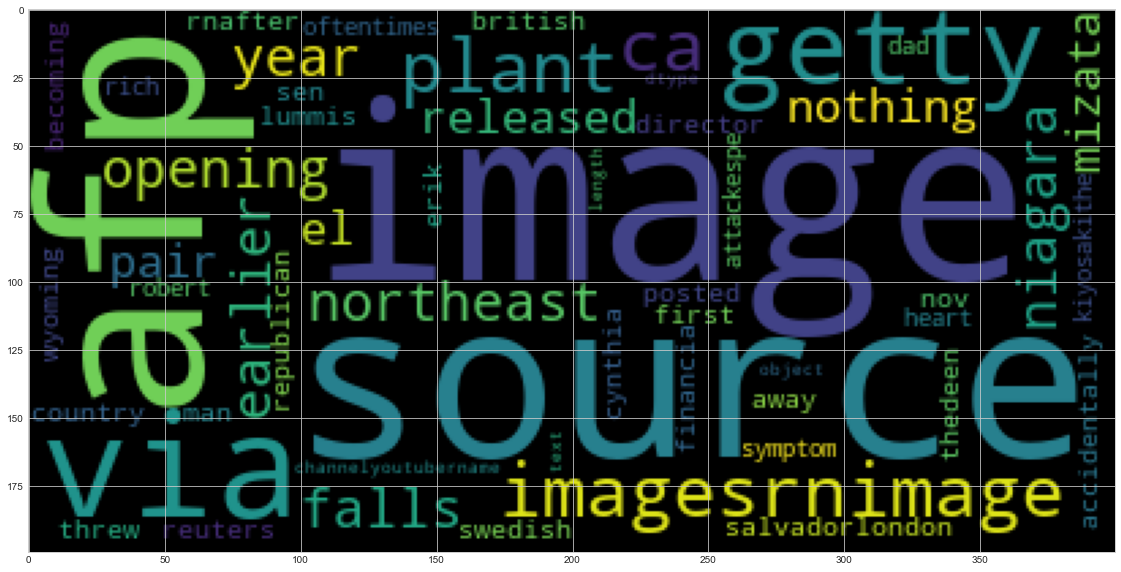

In [139]:
btc_wc = WordCloud().generate(btc_str)
plt.imshow(btc_wc)

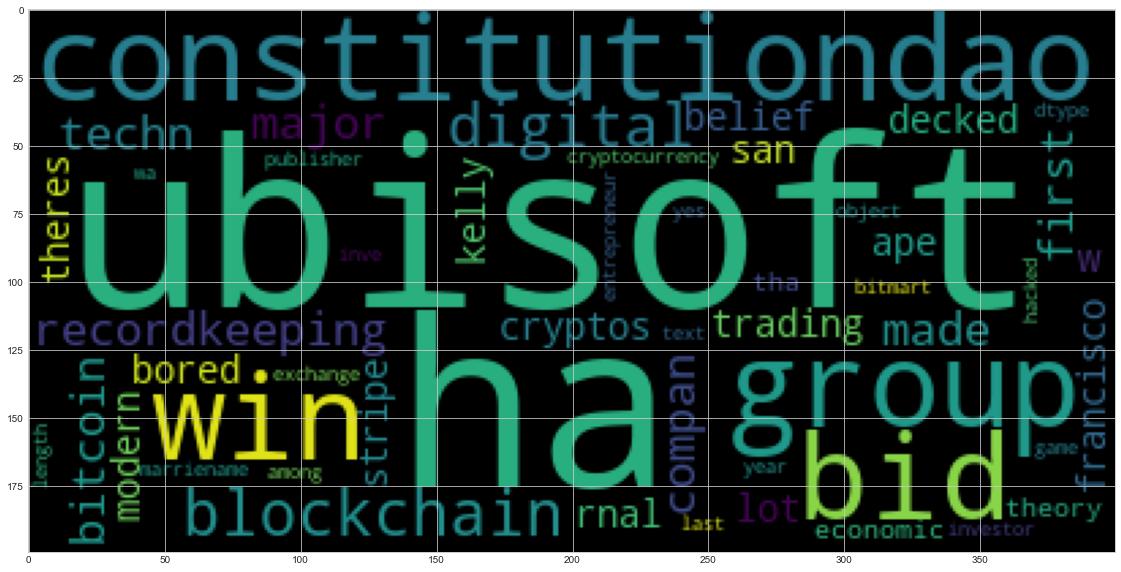

In [140]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_str)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [141]:
import spacy
from spacy import displacy

In [143]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [153]:
# Concatenate all of the Bitcoin text together
btc_all=pd.DataFrame(btc_df.text)
btc_all=' '.join(btc_all['text'])
type(btc_all)

str

In [154]:
# Run the NER processor on all of the text
btc_nlp=nlp(btc_all)
btc_nlp

Image source, AFP via Getty Images
Image caption, Modi has has more than 70 million Twitter followers
Indian Prime Minister Narendra Modi's Twitter account was hacked with a message saying India ha… [+854 chars] The plant opening northeast of Niagara Falls this month, in Somerset, N.Y., is part of a $550 million project by Terawulf, a Bitcoin mining company. The project also includes a proposed 150-megawatt … [+1514 chars] Earlier this year, Nothing released a pair of relatively cheap $99 Ear 1 earbuds with a fun transparent case, wireless charging and decent sound quality. Now, the company (created by OnePlus cofounde… [+1395 chars] MIZATA, El Salvador/LONDON, Nov 22 (Reuters) - El Salvador plans to build the world's first "Bitcoin City" with money from a $1 billion bitcoin-backed bond the country's President Nayib Bukele said o… [+3147 chars] Posted 
After becoming the first country to accept the cryptocurrency as legal tender, El Salvador plans to build the world's first Bitcoin Cit

In [156]:
# Render the visualization
displacy.render(btc_nlp, style='ent')

In [28]:
# Add a title to the document
# YOUR CODE HERE!

In [157]:
# List all Entities
print([ent.text for ent in btc_nlp.ents])

['AFP', 'Getty Images', 'Modi', 'more than 70 million', 'Twitter', 'Indian', "Narendra Modi's", 'Twitter', 'India', 'Niagara Falls', 'this month', 'Somerset', 'N.Y.', '$550 million', 'Terawulf', '150-megawatt', 'Earlier this year', '99', 'OnePlus', 'El Salvador/', 'Reuters', 'El Salvador', 'first', 'Bitcoin City', '$1 billion', 'Nayib Bukele', 'first', 'El Salvador', 'Bitcoin City', 'Twitter', 'TechCrunch', 'Indian', "Narendra Modi's", 'Twitter', '+1087', 'November 29, 2021', 'REUTERS', 'Dado Ruvic/IllustrationDec', '12', 'Reuters', 'Sunday', 'above $50,000', '99', 'December 13th', 'The Ear 1', 'Nothings Ear 1', 'earlier this year', 'Reuters', 'Monday', 'Florida', 'half', 'Spotify', 'Adele', '30', '+3186', 'Dec 4', 'Reuters', '8.4%', '49,228.82', '20:01', 'Saturday', '4,514.87', 'Bitcoin', '28.7%', 'fifth', 'Saturday', 'nearly a billion dollars', 'fifth', 'Saturday', 'nearly a billion dollars', 'Reuters', '5.5%', '53,435.9', '22:04', 'Friday', '3,112.06', 'Bitcoin', '22.6%', 'Bitcoin',

---

### Ethereum NER

In [155]:
# Concatenate all of the Ethereum text together
eth_all=pd.DataFrame(eth_df.text)
eth_all=' '.join(eth_all['text'])
eth_all

'The ConstitutionDAO group did not win its bid to buy a copy of the US Constitution, however, amassing the $40 million USD in Etherium cost them $1 million in transaction fees, and assumedly will cost… [+958 chars] Blockchain is the digital record-keeping technology behind cryptocurrency networks like Bitcoin and Etherium. It has become a potential game-changer for financial services and other industrial areas,… [+8619 chars] Ubisoft has made itself the first major company in gaming to bring NFTs (non-fungible tokens) to the medium. Through a new service called Ubisoft Quartz, players will be able to earn playable NFT cos… [+1371 chars] While bitcoin and other cryptos were trading with a marginal fall of around 1 per cent, prices in rupees on Indian exchanges crashed by over 10 per cent on Wednesday. The price of Bitcoin in US dolla… [+3257 chars] The Bored Ape will now be decked out in stripes, as Adidas partners with the hottest NFT project of the moment for its first foray into the 

In [158]:
# Run the NER processor on all of the text
eth_nlp=nlp(eth_all)
eth_nlp

The ConstitutionDAO group did not win its bid to buy a copy of the US Constitution, however, amassing the $40 million USD in Etherium cost them $1 million in transaction fees, and assumedly will cost… [+958 chars] Blockchain is the digital record-keeping technology behind cryptocurrency networks like Bitcoin and Etherium. It has become a potential game-changer for financial services and other industrial areas,… [+8619 chars] Ubisoft has made itself the first major company in gaming to bring NFTs (non-fungible tokens) to the medium. Through a new service called Ubisoft Quartz, players will be able to earn playable NFT cos… [+1371 chars] While bitcoin and other cryptos were trading with a marginal fall of around 1 per cent, prices in rupees on Indian exchanges crashed by over 10 per cent on Wednesday. The price of Bitcoin in US dolla… [+3257 chars] The Bored Ape will now be decked out in stripes, as Adidas partners with the hottest NFT project of the moment for its first foray into the m

In [159]:
# Render the visualization
displacy.render(eth_nlp, style='ent')

In [32]:
# Add a title to the document
# YOUR CODE HERE!

In [160]:
# List all Entities
print([ent.text for ent in eth_nlp.ents])

['ConstitutionDAO', 'the US Constitution', '$40 million', '$1 million', 'Bitcoin and Etherium', 'Ubisoft', 'first', 'Ubisoft Quartz', 'NFT', 'Indian', '10 per cent', 'Wednesday', 'US', 'The Bored Ape', 'NFT', 'first', 'Friday, December 17', 'today', '9 am', 'roughly $US2.4', '3', 'Last year', 'Dave', 'Brit Morin', 'James Higa', 'Apple', 'nearly a dozen years', 'Nate Bosshard', '] PlayUp', 'Australia', 'New Jersey', 'Colorado', 'U.S.', 'Laila Mintas', 'AP', 'Al Kelly', '91-year-old', 'VPN', 'Raghu Yarlagadda - FalconX', 'Raghu Yarlagadda - FalconX', 'Raghu Yarlagadda', 'FalconX', '$3.5 billion', 'this week', 'The Monthly Economic Report', 'October', 'last week', 'Delve', 'sec', 'Imperium', 'Frater', '16', 'Tal Alexander', 'The Alexander Team', 'Douglas Elliman', 'first', 'iStock', 'BFA', 'first', '27-inch', '240Hz', 'WQHD', 'IPS', 'LCD', 'Meta Birkin NFT', 'this year', 'NF', 'Terry Lash', 'NFT', 'Gigabyte', 'the Gigabyte DRM Fix Tool', 'Gigabyte Z690', 'Alder Lake', '2022', 'Litecoin, E

---